In [1]:
# Load
# Preprocess
# Split (Train, Test)
# Train
# Evaluate
# Predict

In [2]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
#Load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print(train_images.shape)

(60000, 28, 28)


In [6]:
print(test_images.shape)

(10000, 28, 28)


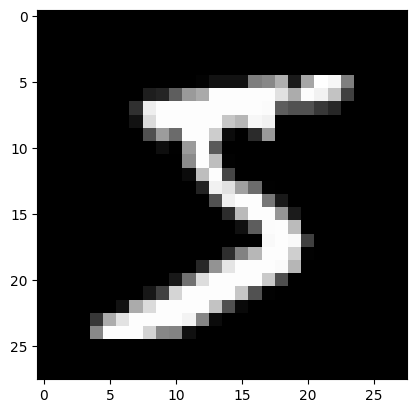

In [7]:
plt.imshow(train_images[0], cmap='gray')

In [8]:
train_labels[0]

5

In [9]:
train_images[0].shape

(28, 28)

In [10]:
import numpy as np
train_images =np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

In [11]:
#train_images = train_images.reshape(60000, 28*28)
#test_images = test_images.reshape(10000, 28*28)


In [12]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [15]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 45)




In [17]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels,  val_labels = train_test_split(train_images, train_labels, test_size = 0.1)

In [18]:
from keras.models import Sequential
from keras import layers

In [19]:
model = Sequential()

#CNN
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1), input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


#Classification
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))









#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])

In [34]:
hist = model.fit(datagen.flow(train_images, train_labels),validation_data=(val_images, val_labels), verbose=1 , epochs=5, batch_size=32)

Epoch 1/5
1688/1688 [==============================] - 126s 75ms/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0540 - val_accuracy: 0.9853
Epoch 2/5
1688/1688 [==============================] - 124s 73ms/step - loss: 0.0423 - accuracy: 0.9865 - val_loss: 0.0453 - val_accuracy: 0.9883
Epoch 3/5
1688/1688 [==============================] - 131s 78ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0371 - val_accuracy: 0.9908
Epoch 4/5
1688/1688 [==============================] - 123s 73ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0447 - val_accuracy: 0.9888
Epoch 5/5
1688/1688 [==============================] - 126s 74ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0445 - val_accuracy: 0.9898


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [36]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
hist.history['loss']

[0.04703982546925545,
 0.04230746254324913,
 0.039244286715984344,
 0.03707776963710785,
 0.03496892750263214]

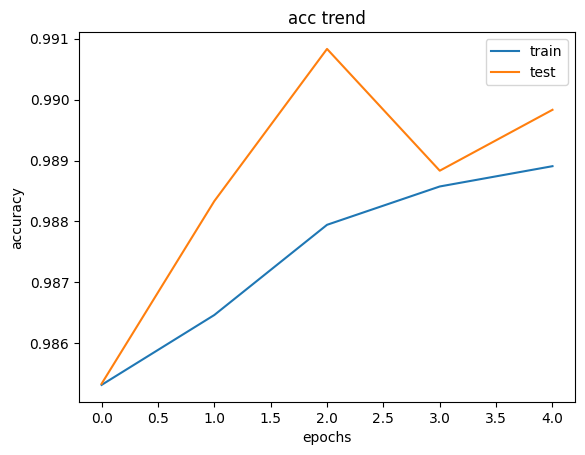

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('acc trend')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()


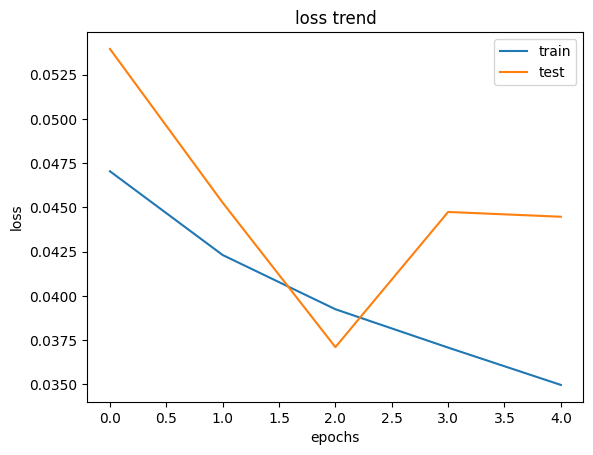

In [41]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss trend')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0446 - accuracy: 0.9867
0.04457330331206322 0.9866999983787537


In [24]:
!pwd

/content


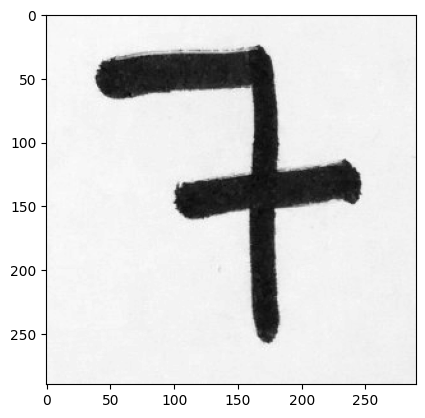

In [25]:
import cv2
im_gray = cv2.imread('/content/drive/MyDrive/Test_MNIST/seven.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(im_gray, cmap='gray')

1/1 [==============================] - 0s 113ms/step
[[4.2276666e-02 8.0048265e-03 2.9443443e-01 4.2226282e-01 2.6748219e-04
  2.2836152e-02 3.4569703e-02 2.2929127e-03 1.7226143e-01 7.9353916e-04]]


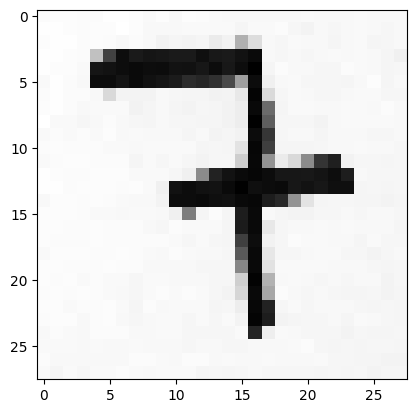

In [26]:
im_gray_resized = cv2.resize(im_gray, (28, 28))
plt.imshow(im_gray_resized, cmap='gray')
im_gray_flatten = im_gray_resized.reshape(1, 28, 28, 1)
im_gray_normalized = im_gray_flatten.astype('float32')/255

preds = model.predict(im_gray_normalized)
print(preds)

In [27]:
import numpy as np
predicted_label = np.argmax(preds)
print(predicted_label)

3


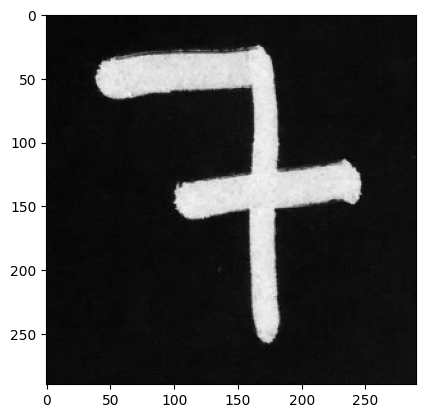

In [28]:
import cv2
im_gray_2 = cv2.imread('/content/drive/MyDrive/Test_MNIST/seven.png', cv2.IMREAD_GRAYSCALE)
#plt.imshow(im_gray, cmap='gray')
im_gray_inverted= cv2.bitwise_not(im_gray_2)
plt.imshow(im_gray_inverted, cmap='gray')

1/1 [==============================] - 0s 24ms/step
[[5.7853658e-06 4.7661704e-03 1.5315601e-01 6.2560183e-01 3.2977890e-03
  5.3422322e-04 1.8510564e-04 1.9883215e-01 1.2804409e-02 8.1650290e-04]]


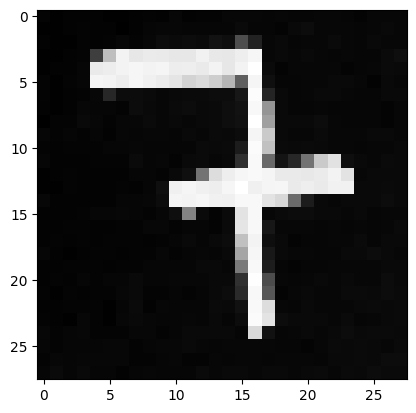

In [29]:
im_gray_resized = cv2.resize(im_gray_inverted, (28, 28))
plt.imshow(im_gray_resized, cmap='gray')
im_gray_flatten = im_gray_resized.reshape(1, 28, 28, 1)
im_gray_normalized = im_gray_flatten.astype('float32')/255

preds = model.predict(im_gray_normalized)
print(preds)

In [30]:
predicted_label = np.argmax(preds)
print(predicted_label)

3


In [31]:
t_image = test_images[16].reshape(1, 28, 28, 1)
preds = model.predict(t_image)
print(preds)


1/1 [==============================] - 0s 25ms/step
[[5.2459698e-10 7.4658929e-16 1.4212802e-09 2.8471767e-11 8.0084186e-07
  2.5087735e-08 1.8068644e-11 4.8988131e-08 2.9613780e-05 9.9996960e-01]]


In [32]:
predicted_label = np.argmax(preds)
print(predicted_label)

9


In [33]:
test_labels[16]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)